This dataset contains 433 images with bounding box annotations of the car license plates within the image. Our goal here is to train a convolutional neural network capable of locating licenses plate on new images. 


"Mô hình Keras" thường đề cập đến một mô hình máy học được xây dựng và huấn luyện bằng sử dụng thư viện Keras, một thư viện học sâu phổ biến và dễ sử dụng cho Python. Keras cung cấp một API cao cấp để xây dựng, huấn luyện và đánh giá các mô hình học sâu.

Mô hình Keras (Keras Model):
Một mô hình Keras là một đối tượng Python được sử dụng để định nghĩa kiến trúc của một mạng nơ-ron. Một mô hình có thể bao gồm một hoặc nhiều lớp, và nó có thể được sử dụng để thực hiện các nhiệm vụ như phân loại, dự đoán hoặc phân đoạn.

Các bước chính để tạo và sử dụng một mô hình Keras bao gồm:

Xác định Kiến Trúc Mô Hình: Sử dụng API của Keras để xác định kiến trúc của mô hình, bao gồm các lớp (như lớp tích chập, lớp Dense, và lớp kích hoạt) và cách chúng kết nối với nhau.

Biên dịch Mô Hình: Sử dụng phương thức compile() để cấu hình quá trình huấn luyện của mô hình, bao gồm hàm mất mát, thuật toán tối ưu hóa và các chỉ số đánh giá.

Huấn Luyện Mô Hình: Sử dụng phương thức fit() để huấn luyện mô hình trên tập dữ liệu huấn luyện, và đánh giá hiệu suất của nó trên tập dữ liệu xác thực.

Đánh Giá và Dự Đoán: Sử dụng mô hình đã huấn luyện để đánh giá hiệu suất trên tập dữ liệu kiểm tra hoặc dự đoán kết quả cho các dữ liệu mới.

Một số loại mô hình phổ biến được xây dựng bằng Keras bao gồm các mô hình phân loại ảnh như VGG, ResNet, và mạng nơ-ron hồi quy (RNN) như LSTM và GRU.

Thông qua Keras, việc tạo và sử dụng mô hình máy học trở nên đơn giản hơn, đặc biệt là đối với những người mới bắt đầu trong lĩnh vực học sâu.

## Preparation of the data

Import libraries

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import cv2
import os
import glob

Chúng tôi hiển thị các tập tin trong tiết mục Kaggle:

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Chúng ta tạo biến X chứa tất cả hình ảnh ô tô bằng cách thay đổi kích thước của chúng.



In [3]:
IMAGE_SIZE = 224

In [4]:
img_dir = "images" # Enter Directory of all images 
data_path = os.path.join(img_dir,'*g')
files = glob.glob(data_path)
files.sort() 
#Chúng tôi sắp xếp các hình ảnh theo thứ tự bảng chữ cái để khớp chúng với các tệp xml chứa chú thích của các hộp giới hạn
X=[]
for f1 in files:
    img = cv2.imread(f1)
    img = cv2.resize(img, (IMAGE_SIZE,IMAGE_SIZE))
    X.append(np.array(img))
    


# Đường dẫn đến thư mục chứa tất cả các hình ảnh
img_dir = "images"  # Thay thế bằng đường dẫn thực tế đến thư mục hình ảnh

# Tạo đường dẫn tới tất cả các tệp tin hình ảnh trong thư mục
data_path = os.path.join(img_dir, '*g')  # '*g' để khớp với các phần mở rộng như .jpg, .jpeg, .png
files = glob.glob(data_path)

# Sắp xếp các tệp tin hình ảnh theo thứ tự bảng chữ cái
files.sort()

# Khởi tạo danh sách để lưu trữ các hình ảnh
X = []



# Duyệt qua từng tệp tin hình ảnh
for f1 in files:
    # Đọc hình ảnh từ tệp tin
    img = cv2.imread(f1)
    
    # Thay đổi kích thước hình ảnh
    img = cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE))
    
    # Thêm hình ảnh vào danh sách X dưới dạng mảng numpy
    X.append(np.array(img))




Chúng ta tạo biến y chứa tất cả các chú thích hộp giới hạn (nhãn).
Trước đó, chúng ta sẽ phải thay đổi kích thước các chú thích sao cho phù hợp với kích thước mới của hình ảnh (200*200). Chúng tôi tạo một chú thích thay đổi chức năng cho điều đó.

In [5]:
from lxml import etree
def resizeannotation(f):
    tree = etree.parse(f)
    # Lấy kích thước gốc của hình ảnh
    for dim in tree.xpath("size"):
        width = int(dim.xpath("width")[0].text) # lấy ra chiều rộng của ảnh
        height = int(dim.xpath("height")[0].text) # lấy ra chiều dài của ảnh
    # Thay đổi kích thước các chú thích hộp giới hạn
    for dim in tree.xpath("object/bndbox"):
        xmin = int(dim.xpath("xmin")[0].text)/(width/IMAGE_SIZE) # xác định x min mới 
        ymin = int(dim.xpath("ymin")[0].text)/(height/IMAGE_SIZE) #.....
        xmax = int(dim.xpath("xmax")[0].text)/(width/IMAGE_SIZE)
        ymax = int(dim.xpath("ymax")[0].text)/(height/IMAGE_SIZE)
    return [int(xmax), int(ymax), int(xmin), int(ymin)]
        


In [6]:

# Đường dẫn đến thư mục chứa các tệp tin chú thích
path = 'annotations'

# Lấy danh sách tất cả các tệp tin chú thích và sắp xếp theo thứ tự bảng chữ cái
text_files = ['annotations/' + f for f in sorted(os.listdir(path))]

# Khởi tạo danh sách để lưu trữ các chú thích hộp giới hạn
y = []

# Duyệt qua từng tệp tin chú thích
for file_path in text_files:
    # Áp dụng hàm resizeannotation để thay đổi kích thước các chú thích và thêm chúng vào danh sách bounding_boxes
    y.append(resizeannotation(file_path))

# Kiểm tra kết quả
print(f"Số lượng chú thích hộp giới hạn: {len(y)}")

Số lượng chú thích hộp giới hạn: 433


In [7]:
resizeannotation("annotations/Cars1.xml")

[146, 144, 75, 115]

In [8]:
y[0]

[187, 144, 101, 104]

We check X et y shape

In [12]:
np.array(X).shape

(433, 224, 224, 3)

In [13]:
np.array(y).shape

(433, 4)

Và chúng tôi hiển thị mười tám hình ảnh đầu tiên của tập dữ liệu:

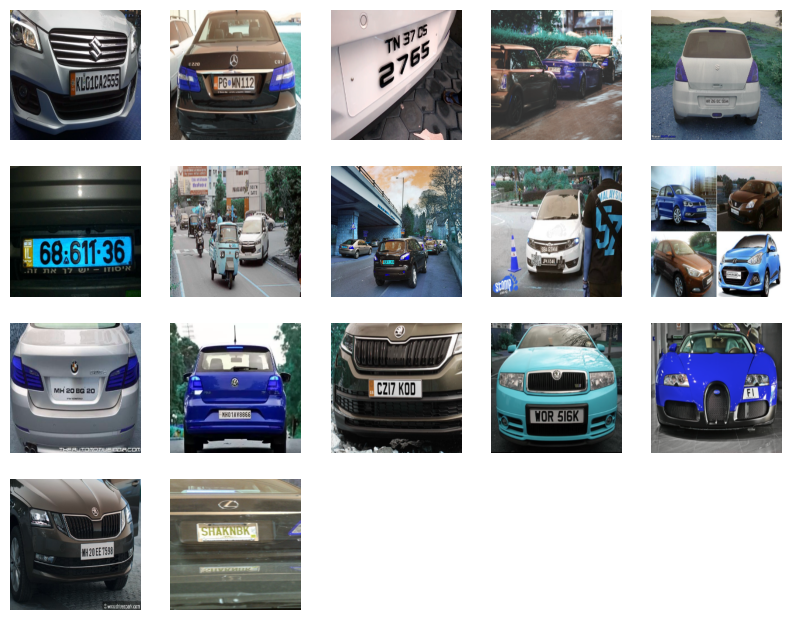

In [14]:
plt.figure(figsize=(10,20))
for i in range(0,17) :
    plt.subplot(10,5,i+1)
    plt.axis('off')
    plt.imshow(X[i])

Chúng ta có thể vẽ hình chữ nhật chứa biển số xe bằng thư viện OpenCV

In [3]:
# Lấy hình ảnh đầu tiên từ tập dữ liệu
# Vẽ bounding box trên hình ảnh
# x là ảnh cần check 
# (y[0][0],y[0][1]),(y[0][2],y[0][3]) vị trí của biển số xe 
#  0 0 255 màu sắc
image = cv2.rectangle(X[0],(y[0][0],y[0][1]),(y[0][2],y[0][3]),(0, 0, 255)) 
# Hiển thị hình ảnh có bounding box
plt.imshow(image)
plt.show()





NameError: name 'cv2' is not defined

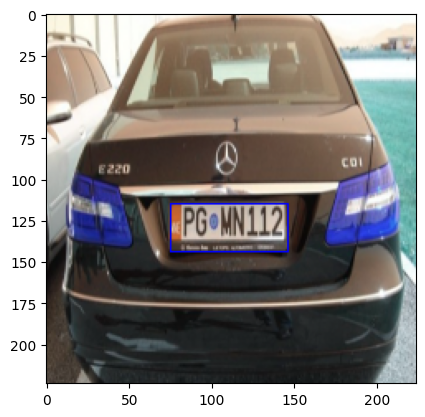

In [16]:
#Example with the second image of the dataset
image = cv2.rectangle(X[1],(y[1][0],y[1][1]),(y[1][2],y[1][3]),(0, 0, 255))
plt.imshow(image)
plt.show()

We prepare the data for the CNN :

In [17]:
#Transforming in array
X=np.array(X)
y=np.array(y)

In [18]:
#Renormalisation
X = X / 255
y = y / 255

We split our dataset in two : training set/testing set

Trong quá trình huấn luyện mô hình máy học, chia tập dữ liệu thành các tập huấn luyện (training set), tập kiểm tra (test set) và tập xác thực (validation set) là một phần quan trọng để đánh giá hiệu suất của mô hình.

Tập Huấn Luyện (Training Set): Đây là phần của dữ liệu được sử dụng để huấn luyện mô hình, tức là mô hình sẽ học từ dữ liệu trong tập huấn luyện để điều chỉnh các trọng số và siêu tham số của nó.

Tập Kiểm Tra (Test Set): Đây là phần của dữ liệu được sử dụng để đánh giá hiệu suất của mô hình sau khi đã hoàn thành quá trình huấn luyện. Dữ liệu trong tập kiểm tra được sử dụng để đánh giá mức độ tổng quát hóa của mô hình trên dữ liệu mới mà nó chưa từng thấy trước đó.

Tập Xác Thực (Validation Set): Trong một số trường hợp, sau khi huấn luyện mô hình trên tập huấn luyện, bạn có thể cần điều chỉnh các siêu tham số của mô hình để cải thiện hiệu suất của nó. Tập xác thực được sử dụng để đánh giá hiệu suất của mô hình trên dữ liệu mà nó chưa từng thấy trong quá trình huấn luyện, giúp bạn đánh giá liệu mô hình có quá mức hoặc dưới mức trong việc tìm hiểu các siêu tham số.

Trong đoạn mã của bạn:

X_val và y_val chính là tập dữ liệu xác thực, được sử dụng để đánh giá hiệu suất của mô hình trên dữ liệu mới mà nó chưa từng thấy trong quá trình huấn luyện.
X_train, X_test, y_train, và y_test tương ứng với tập huấn luyện và tập kiểm tra.








In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1)

## Convolutionnal Neural Network

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam


VGG16 là một kiến trúc mạng nơ-ron tích chập (CNN) phổ biến được giới thiệu bởi Simonyan và Zisserman từ Đại học Oxford trong bài báo "Very Deep Convolutional Networks for Large-Scale Image Recognition" vào năm 2014. Tên của mô hình (VGG16) tượng trưng cho "16" lớp mạng, bao gồm các lớp tích chập (convolutional layers) và các lớp pooling, được xếp chồng lên nhau.

Lớp Dense, hay còn được gọi là lớp kết nối đầy đủ, là một lớp trong mạng nơ-ron hồi quy (neural network) mà mỗi nơ-ron của lớp này được kết nối với tất cả các nơ-ron ở lớp trước và lớp sau đó (nếu có). Cụ thể:

Input: Một lớp Dense nhận vào đầu vào từ lớp trước đó. Đầu vào này thường là một vectơ 1D (nếu không có lớp Flatten trước đó).
Output: Mỗi nơ-ron của lớp Dense sẽ tạo ra một giá trị đầu ra, và tất cả các giá trị đầu ra này sẽ tạo thành đầu ra của lớp.
Trọng số và độ lệch: Mỗi kết nối giữa các nơ-ron sẽ có một trọng số tương ứng, và mỗi nơ-ron cũng có một độ lệch (bias) đi kèm. Cả hai này sẽ được học trong quá trình huấn luyện mô hình.
Hàm kích hoạt: Một hàm kích hoạt thường được áp dụng lên đầu ra của mỗi nơ-ron, giúp mô hình học được các tính chất phi tuyến tính của dữ liệu.
Lớp Flatten:
Lớp Flatten thường được sử dụng để chuyển đổi các đặc trưng 2D thành một vectơ 1D trước khi đưa vào các lớp Dense. Cụ thể:

Input: Lớp Flatten nhận vào đầu vào từ các lớp tích chập hoặc các lớp đặc trưng có hình dạng 2D (ví dụ: chiều cao, chiều rộng, số kênh).
Output: Một vectơ 1D với tất cả các giá trị được làm phẳng thành một chiều duy nhất.
Chức năng: Lớp Flatten giúp giảm kích thước không gian của các đặc trưng, làm cho chúng phù hợp với đầu vào của các lớp Dense.

In [21]:
# Create the model
model = Sequential()
model.add(VGG16(weights="imagenet", include_top=False, input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
model.add(Flatten())
model.add(Dense(128, activation="relu")) #Thêm một lớp fully connected với 128 neurons và hàm kích hoạt ReLU.
model.add(Dense(128, activation="relu")) #Thêm một lớp fully connected với 128 neurons và hàm kích hoạt ReLU.
model.add(Dense(64, activation="relu")) #Thêm một lớp fully connected với 128 neurons và hàm kích hoạt ReLU.
model.add(Dense(4, activation="sigmoid")) #Thêm một lớp fully connected với 128 neurons và hàm kích hoạt ReLU.
 
model.layers[-6].trainable = False

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ ?                      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

Trong bảng này:

"Layer (type)" là tên của mỗi lớp trong mô hình.
"Output Shape" là hình dạng đầu ra của mỗi lớp. Dấu "?" cho biết hình dạng đầu ra sẽ được xác định sau khi mô hình được xây dựng.
"Param #" là số lượng tham số của mỗi lớp. Trong trường hợp này, số lượng tham số chỉ được ước lượng, vì mô hình chưa được xây dựng.
"Total params" là tổng số lượng tham số của toàn bộ mô hình.
"Trainable params" là số lượng tham số có thể được huấn luyện.
"Non-trainable params" là số lượng tham số không thể được huấn luyện.

Trong mạng nơ-ron hồi quy (Neural Network), mô hình tuần tự (Sequential Model) là một kiểu mô hình mạng nơ-ron trong thư viện Keras (hoặc TensorFlow). Mô hình tuần tự là một chuỗi các lớp được xây dựng theo tuần tự, từ đầu đến cuối, mỗi lớp có thể là một lớp Dense, một lớp tích chập (Convolutional Layer), một lớp LSTM, hoặc bất kỳ lớp nào khác mà bạn muốn thêm vào mô hình.

Trong mô hình tuần tự, dữ liệu chảy qua từng lớp một cách tuần tự, bắt đầu từ lớp đầu vào và đi qua các lớp ẩn cho đến lớp đầu ra. Mỗi lớp trong mô hình nhận đầu vào từ lớp trước đó và tạo ra đầu ra để chuyển đến lớp tiếp theo.

Việc sử dụng mô hình tuần tự giúp đơn giản hóa quá trình xây dựng mạng nơ-ron và làm cho mã trở nên dễ đọc hơn, đặc biệt là đối với các mô hình có cấu trúc đơn giản hoặc trung bình.

In [22]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

Dòng mã này sử dụng phương thức compile() của mô hình Keras để cấu hình quá trình huấn luyện của mạng nơ-ron. Dưới đây là mô tả về các tham số được sử dụng trong compile():

loss: Đây là hàm mất mát được sử dụng để đo lường mức độ sai lệch giữa các dự đoán của mô hình và các giá trị thực tế trong quá trình huấn luyện. Trong trường hợp này, hàm mất mát được sử dụng là 'mean_squared_error', tức là sai số bình phương trung bình giữa các dự đoán và giá trị thực tế.

optimizer: Đây là thuật toán tối ưu hóa được sử dụng để điều chỉnh các trọng số của mạng nơ-ron dựa trên giá trị mất mát. Trong trường hợp này, 'adam' là một trong những thuật toán tối ưu hóa phổ biến được sử dụng.

metrics: Đây là danh sách các chỉ số được sử dụng để đánh giá hiệu suất của mô hình trong quá trình huấn luyện. Trong trường hợp này, 'accuracy' được chọn làm chỉ số để đánh giá tỷ lệ dự đoán đúng của mô hình.

Dòng mã này sử dụng phương thức fit() của mô hình Keras để huấn luyện mô hình trên tập dữ liệu huấn luyện và đánh giá hiệu suất trên tập dữ liệu xác thực. Dưới đây là mô tả về các tham số được sử dụng trong fit():

X_train, y_train: Dữ liệu huấn luyện và nhãn tương ứng.

validation_data: Dữ liệu và nhãn của tập xác thực được sử dụng để đánh giá hiệu suất của mô hình trong quá trình huấn luyện. Trong trường hợp này, X_val và y_val được sử dụng làm tập dữ liệu xác thực.

epochs: Số lượng epochs (vòng lặp) mà mô hình sẽ được huấn luyện trên toàn bộ tập dữ liệu huấn luyện. Mỗi epoch tương ứng với việc mô hình sẽ được huấn luyện qua toàn bộ tập dữ liệu huấn luyện một lần.

batch_size: Kích thước của các batch dữ liệu được sử dụng trong quá trình huấn luyện. Mô hình sẽ cập nhật trọng số sau mỗi batch.

verbose: Điều này xác định cách hiển thị tiến trình của quá trình huấn luyện. Giá trị 1 có nghĩa là hiển thị tiến trình sau mỗi epoch.

In [23]:
train = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=180, batch_size=10, verbose=1)

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 63s 5s/step - accuracy: 0.4827 - loss: 0.0992 - val_accuracy: 0.5143 - val_loss: 0.1034
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 61s 6s/step - accuracy: 0.6527 - loss: 0.1010 - val_accuracy: 0.1143 - val_loss: 0.0582
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 63s 6s/step - accuracy: 0.4515 - loss: 0.0516 - val_accuracy: 0.3714 - val_loss: 0.0410
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 59s 6s/step - accuracy: 0.5337 - loss: 0.0360 - val_accuracy: 0.6000 - val_loss: 0.0209
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 56s 6s/step - accuracy: 0.6679 - loss: 0.0099 - val_accuracy: 0.5429 - val_loss: 0.0158
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 51s 5s/step - accuracy: 0.8201 - loss: 0.0050 - val_accuracy: 0.6571 - val_loss: 0.0133
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 50s 5s/step - accuracy: 0.8557 - loss: 0.0031 - val_accuracy: 0.6857 - val_loss: 0.0135
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 63s 6s/step - accuracy: 0.8923 - loss: 0.0018 - val_accuracy: 0.7429 - val_loss:

In [24]:
model.save('model_name.keras')

In [25]:
# Test
scores = model.evaluate(X_test, y_test, verbose=0)
print("Score : %.2f%%" % (scores[1]*100))

Score : 85.06%


In [26]:
def plot_scores(train) :
    accuracy = train.history['accuracy']
    val_accuracy = train.history['val_accuracy']
    epochs = range(len(accuracy))
    plt.plot(epochs, accuracy, 'b', label='Score apprentissage')
    plt.plot(epochs, val_accuracy, 'r', label='Score validation')
    plt.title('Scores')
    plt.legend()
    plt.show()

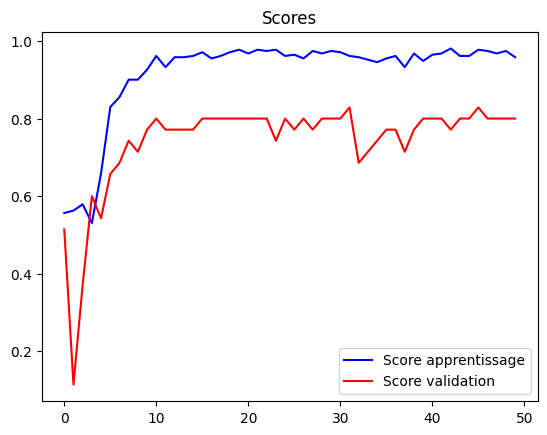

In [27]:
plot_scores(train)

## DETECTION 

In [28]:
test_loss, test_accuracy = model.evaluate(X_test, y_test,steps=int(100))

print("Test results \n Loss:",test_loss,'\n Accuracy',test_accuracy)


100/100 ━━━━━━━━━━━━━━━━━━━━ 37s 365ms/step - accuracy: 0.8566 - loss: 0.0079
Test results 
 Loss: 0.006492151413112879 
 Accuracy 0.8505747318267822


c:\Users\ketoan\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


In [29]:
y_cnn = model.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 23s 7s/step


We can see how our model localize license plates on our testing set :

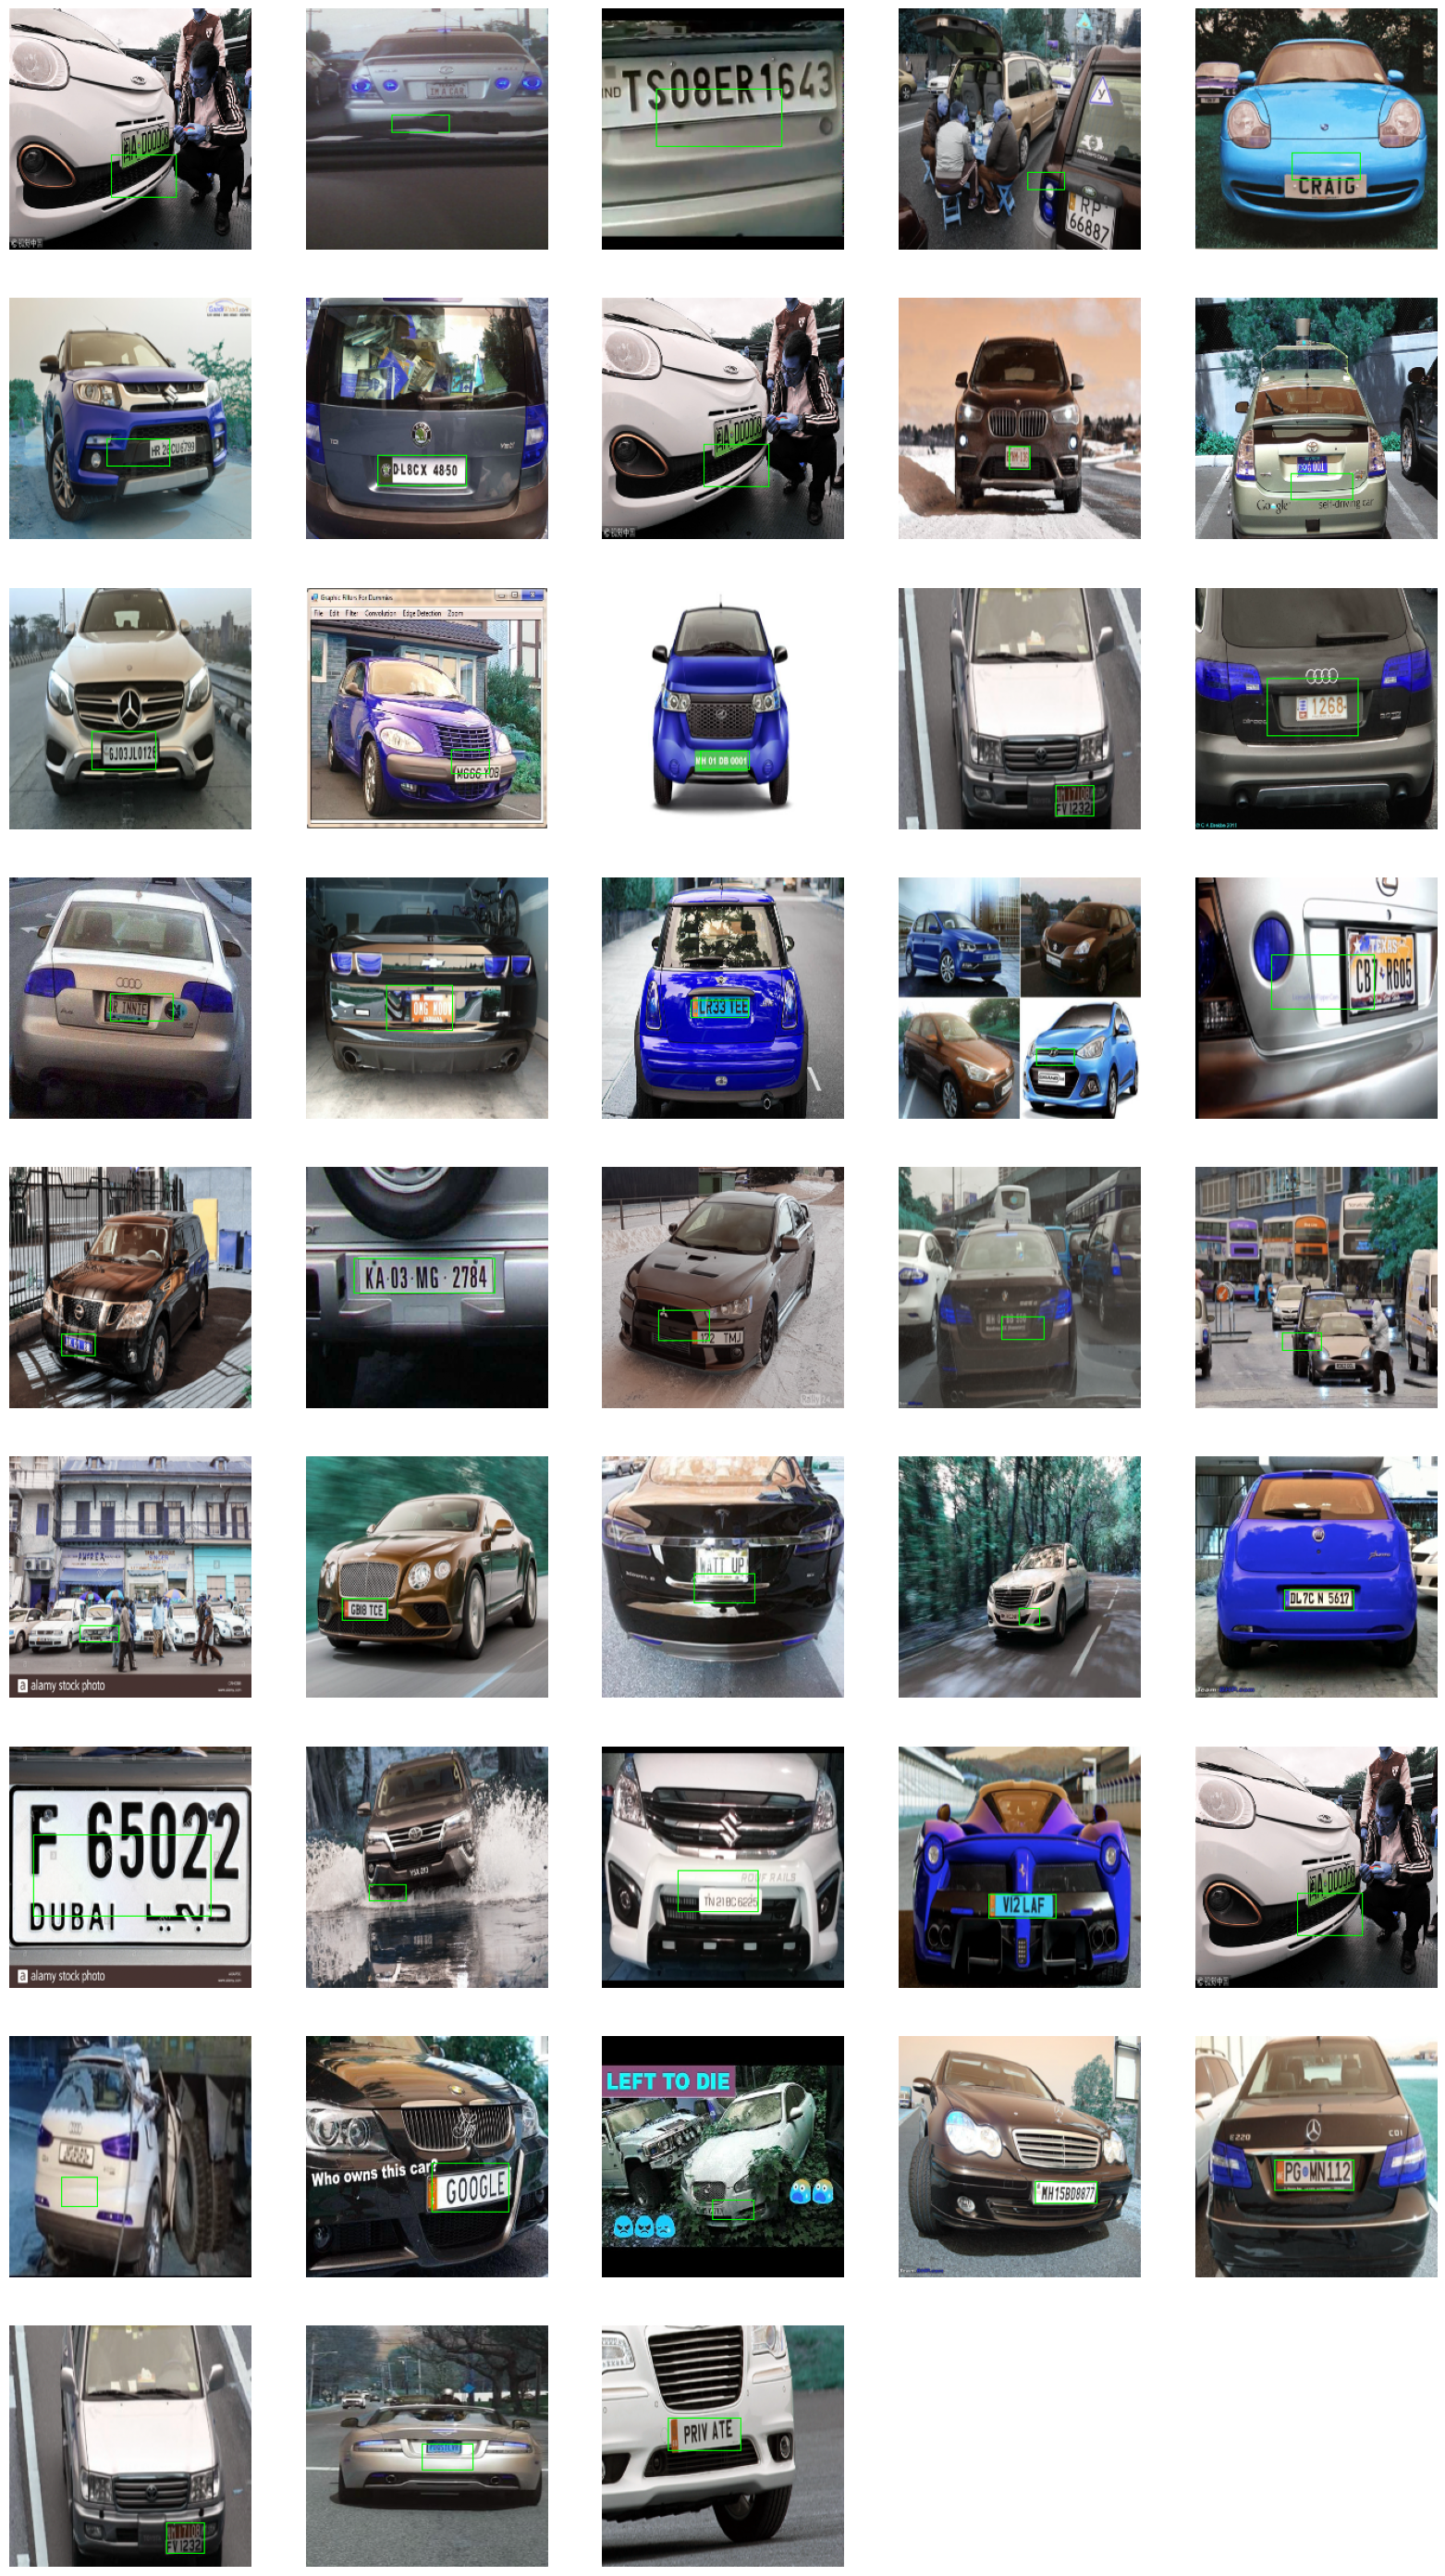

In [30]:
plt.figure(figsize=(20,40))
for i in range(0,43) :
    plt.subplot(10,5,i+1)
    plt.axis('off')
    ny = y_cnn[i]*255
    image = cv2.rectangle(X_test[i],(int(ny[0]),int(ny[1])),(int(ny[2]),int(ny[3])),(0, 255, 0))
    plt.imshow(image)



In [31]:
import tensorflow as tf
print(tf.__version__)  # Phiên bản TensorFlow
print(tf.keras.__version__)  # Phiên bản Keras tích hợp trong TensorFlow

2.16.1
3.3.3
